이전 금융앱 리뷰 예제
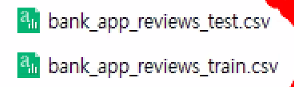
토스, 국민은행 분류분석했던 내용 - 2년치 데이터

#### 텍스트 분석을 위한 워드 클라우드 만들기
자주 등장한 단어의 빈도<br>
수치화데이터로는 연관된 단어를 본다든지했는데 
- 긍정단어 부정단어를 통해 텍스트 분석
- 유사단어 군집화
- 불만 리뷰 클러스터링

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
# train데이터 불러오기
train_df= pd.read_csv("./data/bank_app_reviews_train.csv")
train_df.head()

,리뷰일,평점,사용자리뷰,업체답변,은행명
0,2023-12-21,5,엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!,NaN,하나
1,2025-02-17,1,Cd기 축소 연장하려면 이 어플 깔라는데 왜 30퍼에서 안깔리는지 아니 애초에 슈퍼...,안녕하세요. 신한은행입니다.\n먼저 SOL사용에 불편을 드려 죄송합니다.\n어플의 ...,신한
2,2024-07-26,5,서비스가 통합되어 있어서 점점 사용빈도가 높아지네요.,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민
3,2024-09-01,1,카드 충천이 안됌,"안녕하세요. 전민구 님, 토스팀입니다. 남겨주신 내용만으로는 겪고계신 불편사항의 자...",토스
4,2023-11-13,1,알뜰폰 인증이 안돼요.....,"안녕하세요 헤이모두들안녕님, 우리은행입니다. 먼저 이용에 불편을 드려 매우 죄송합니...",우리


In [4]:
test_df= pd.read_csv("./data/bank_app_reviews_test.csv")
test_df.head()

,리뷰일,평점,사용자리뷰,업체답변,은행명
0,2024-02-08,5,고경민계장님감사해요,"안녕하세요 최순녀 고객님. 칭찬 진심으로 감사드리며, 더욱 편리하고 안정적인 서비스...",우리
1,2023-07-24,5,저축목표피드 새로 생긴거 너무좋은데 분명 카테고리를 저축으로 했는데 왜 인식이 안되...,"신아​ 님, 안녕하세요? 뱅크샐러드 고객감동팀​입니다. 소중한 시간내어 고객센터에 ...",뱅크샐러드
2,2023-09-25,1,아니 이딴걸 편리하게 사용하는앱이라고 쳐만들엇나 이렇게 불편하게만든건 일부러그런거에...,안녕하세요. 우리은행입니다. 먼저 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 보...,우리
3,2024-02-15,3,몇 년째 만족하며 사용중이라 조금식 개선되어거는 모습에 만족하며 사용중입니다. 하지...,안녕하세요? 뱅크샐러드 고객감동팀입니다. 뱅크샐러드에 KB pay를 연결해 모든 자...,뱅크샐러드
4,2023-06-19,5,스타뱅킹을 사용 하고나서부터 편안해서 좋아요,"한송림 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 앞...",국민


In [5]:
# info - rangeIndex보기
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22246 entries, 0 to 22245
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰일     22246 non-null  object
 1   평점      22246 non-null  int64 
 2   사용자리뷰   22246 non-null  object
 3   업체답변    19141 non-null  object
 4   은행명     22246 non-null  object
dtypes: int64(1), object(4)
memory usage: 869.1+ KB


In [6]:
# info - rangeIndex보기
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534 entries, 0 to 9533
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰일     9534 non-null   object
 1   평점      9534 non-null   int64 
 2   사용자리뷰   9534 non-null   object
 3   업체답변    8221 non-null   object
 4   은행명     9534 non-null   object
dtypes: int64(1), object(4)
memory usage: 372.5+ KB


In [ ]:
# Nan 떨어뜨리기 - 현재 전처리가 끝난 상태파일이므로 생략

### 은행별 긍정어 부정어 

In [7]:
train_df['평점'].value_counts()

평점
5    11416
1     6751
4     1824
3     1308
2      947
Name: count, dtype: int64

<Axes: xlabel='평점'>

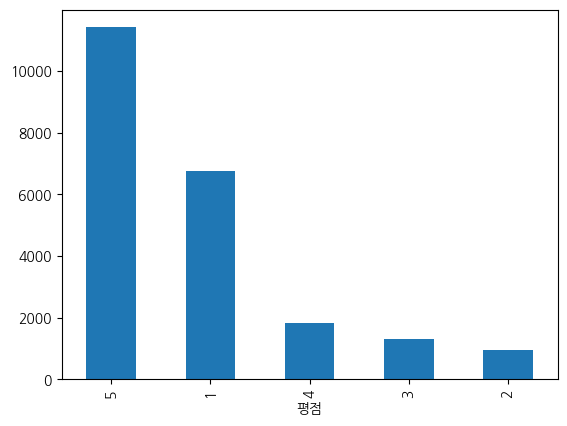

In [8]:
train_df['평점'].value_counts().plot(kind='bar')

In [9]:
# 긍정컬럼 만들기 [0,1]로 구분 긍정(4점5점)
train_df['긍정'] = train_df['평점'].apply(lambda x: 1 if x in [5,4] else 0)
train_df

,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
0,2023-12-21,5,엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!,NaN,하나,1
1,2025-02-17,1,Cd기 축소 연장하려면 이 어플 깔라는데 왜 30퍼에서 안깔리는지 아니 애초에 슈퍼...,안녕하세요. 신한은행입니다.\n먼저 SOL사용에 불편을 드려 죄송합니다.\n어플의 ...,신한,0
2,2024-07-26,5,서비스가 통합되어 있어서 점점 사용빈도가 높아지네요.,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민,1
3,2024-09-01,1,카드 충천이 안됌,"안녕하세요. 전민구 님, 토스팀입니다. 남겨주신 내용만으로는 겪고계신 불편사항의 자...",토스,0
4,2023-11-13,1,알뜰폰 인증이 안돼요.....,"안녕하세요 헤이모두들안녕님, 우리은행입니다. 먼저 이용에 불편을 드려 매우 죄송합니...",우리,0
...,...,...,...,...,...,...
22241,2025-03-12,3,어플 시작오류가 가끔 나네요.,안녕하세요 푸딩 고객님. 우리은행 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 2...,우리,0
22242,2025-01-09,1,업데이트 후에 계좌이체하는 게 자주 튕겨요,안녕하세요 일월구일 고객님. 먼저 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 보...,우리,0
22243,2023-07-07,5,굳굳굳,"Seung Woo Kim 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로...",국민,1
22244,2024-10-10,5,오래시간 같이한 나의은행 든든합니다.,안녕하세요 lee jeong seon (isate) 고객님. 칭찬 진심으로 감사드리...,우리,1


In [10]:
# test 긍정컬럼 만들기 [0,1]로 구분 긍정(4점5점)
test_df['긍정'] = test_df['평점'].apply(lambda x: 1 if x in [5,4] else 0)
test_df

,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
0,2024-02-08,5,고경민계장님감사해요,"안녕하세요 최순녀 고객님. 칭찬 진심으로 감사드리며, 더욱 편리하고 안정적인 서비스...",우리,1
1,2023-07-24,5,저축목표피드 새로 생긴거 너무좋은데 분명 카테고리를 저축으로 했는데 왜 인식이 안되...,"신아​ 님, 안녕하세요? 뱅크샐러드 고객감동팀​입니다. 소중한 시간내어 고객센터에 ...",뱅크샐러드,1
2,2023-09-25,1,아니 이딴걸 편리하게 사용하는앱이라고 쳐만들엇나 이렇게 불편하게만든건 일부러그런거에...,안녕하세요. 우리은행입니다. 먼저 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 보...,우리,0
3,2024-02-15,3,몇 년째 만족하며 사용중이라 조금식 개선되어거는 모습에 만족하며 사용중입니다. 하지...,안녕하세요? 뱅크샐러드 고객감동팀입니다. 뱅크샐러드에 KB pay를 연결해 모든 자...,뱅크샐러드,0
4,2023-06-19,5,스타뱅킹을 사용 하고나서부터 편안해서 좋아요,"한송림 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 앞...",국민,1
...,...,...,...,...,...,...
9529,2025-04-05,1,만보기 이벤트는 실망스러워요. 후기 말투 다 똑같고 사기 맞죠? 양심이 참... 정...,"안녕하세요. 송송님, 토스팀입니다. 만족스러운 서비스를 제공하기 위해 노력하였으나,...",토스,0
9530,2023-05-17,5,기능이 많아 다 사용해보진 못 했지만 대체적으로 편한거 같아요,이강욱 고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 고객...,국민,1
9531,2023-07-05,5,편리하네요.,"농사꾼 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 앞...",국민,1
9532,2024-12-20,5,사용하기 편리해요,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민,1


In [12]:
train_df['은행명'].value_counts()

은행명
국민       8863
토스       6201
우리       2969
하나       1932
신한       1764
뱅크샐러드     517
Name: count, dtype: int64

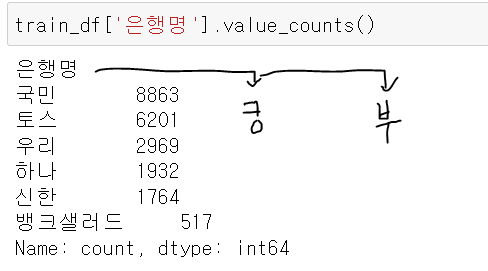
# 변수를 자동 생성하면서<br> 긍부정 데이터프레임만들기
### globals()[변수명]<br><br>전역변수로 저장된 값들을 출력

In [17]:
bank_en_list= ['hana','shinhan','kb','toss','woori','b_salad']

In [18]:
for bank, bank_eng in zip(train_df['은행명'].unique(),bank_en_list):
    print(bank, bank_eng)

하나 hana
신한 shinhan
국민 kb
토스 toss
우리 woori
뱅크샐러드 b_salad


In [ ]:
rain_df[(train_df['은행명']=='토스')& (train_df['긍정']==1)]

In [ ]:
# 토스_긍정에 할당을 모든 은행에 반복작업 생김
toss_pos=rain_df[(train_df['은행명']=='토스')& (train_df['긍정']==1)]

In [18]:
# 반복문에 필터 얹기
for bank, bank_eng in zip(train_df['은행명'].unique(),bank_en_list):
    # 필터
    pos=rain_df[(train_df['은행명']==bank)& (train_df['긍정']==1)]
    pos=rain_df[(train_df['은행명']==bank)& (train_df['긍정']==0)]
    # 전역 변수 자동생성 후 거기에 저장
    globals()[f"{bank_eng}_pos"]=pos 
    globals()[f"{bank_eng}_neg"]=neg 
    

하나 hana
신한 shinhan
국민 kb
토스 toss
우리 woori
뱅크샐러드 b_salad


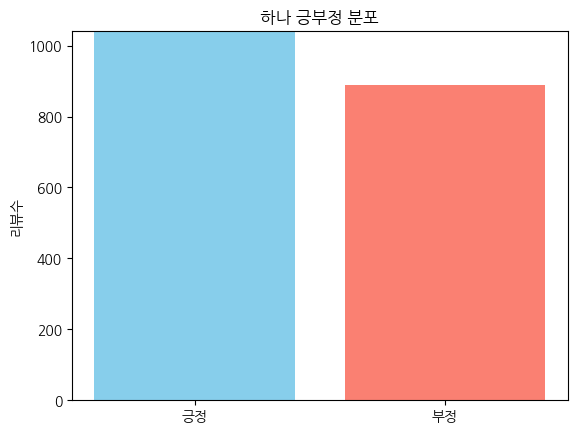

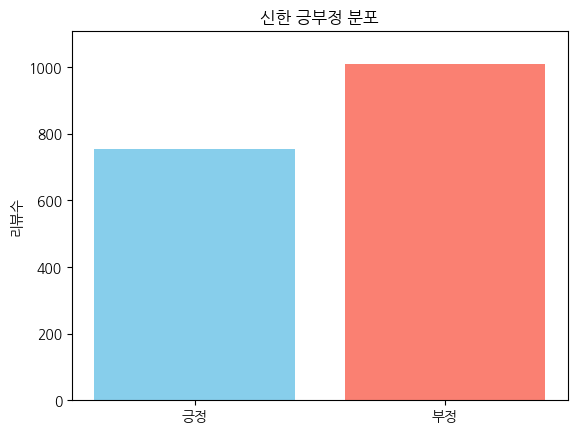

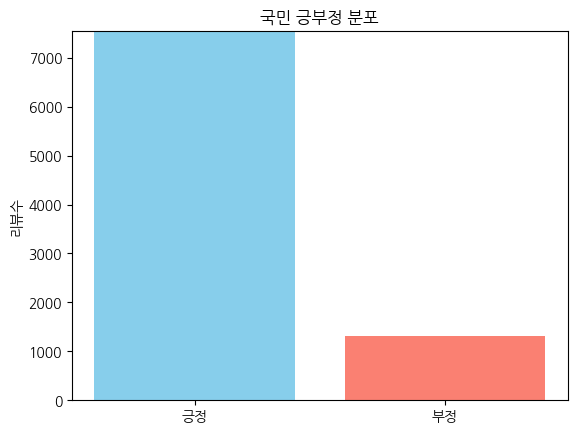

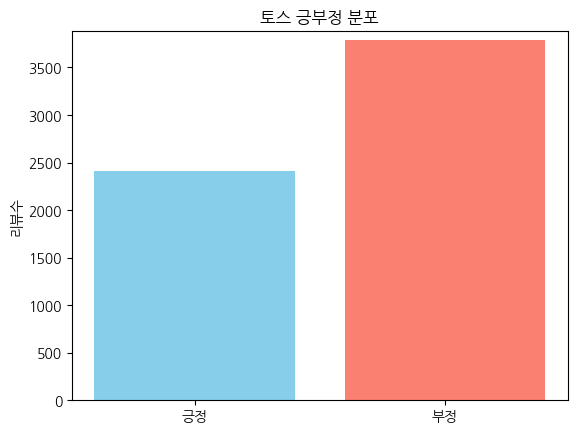

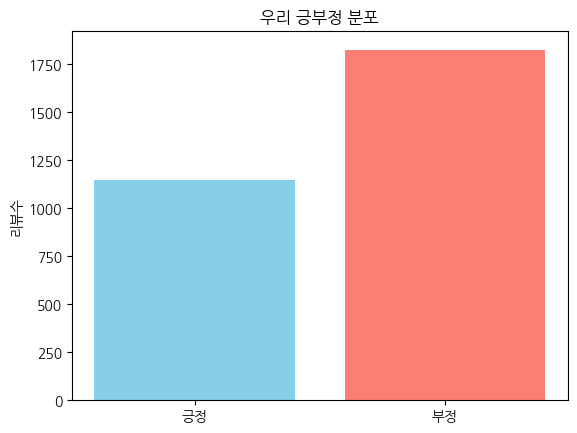

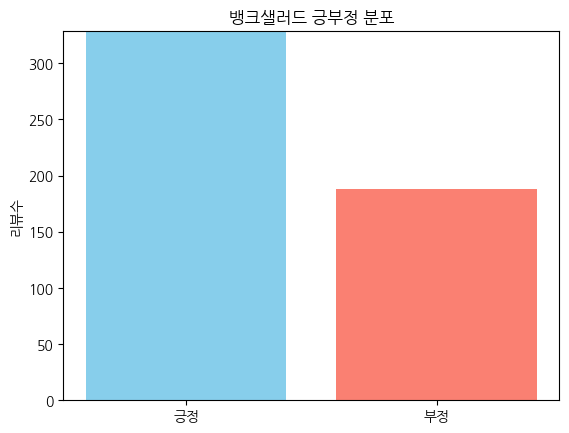

In [26]:
# 리스트가 필요함
pos_neg_list=[]
for bank, bank_eng in zip(train_df['은행명'].unique(),bank_en_list):
    # 필터
    pos=train_df[(train_df['은행명']==bank)& (train_df['긍정']==1)]
    neg=train_df[(train_df['은행명']==bank)& (train_df['긍정']==0)]
    # 전역 변수 자동생성 후 거기에 저장
    globals()[f"{bank_eng}_pos"]=pos 
    globals()[f"{bank_eng}_neg"]=neg 
    pos_neg_list.append(f"{bank_eng}_pos")
    pos_neg_list.append(f"{bank_eng}_neg")
    # 시각화
    plt.bar(['긍정','부정'],[pos.shape[0], neg.shape[0]], color=['skyblue', 'salmon'])
    plt.title(f"{bank} 긍부정 분포")
    plt.ylabel("리뷰수")
    plt.ylim(0, max(pos.shape[0], neg.shape[0]+100))
    plt.show()
    print()

In [21]:
# 토스_긍정에 할당된 개수
train_df[(train_df['은행명']=='토스')& (train_df['긍정']==1)].shape[0]

2415

In [27]:
hana_neg

,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
9,2023-08-22,1,앱이 안열려요.ㅠㅠ,"안녕하세요, 하나은행입니다. 우선 서비스 이용에 불편을 드려 죄송합니다. 앱리뷰 내...",하나,0
23,2025-01-13,1,지문 로그인 이었는데 아까 까지만 해도 잘 되다가 갑자기 서명 필수값이 없다고 나오...,안녕하세요. 하나은행입니다. 우선 이용에 불편을 드려 죄송합니다. 계속적으로 동일한...,하나,0
55,2025-02-23,2,어플 서비스 원활하지 못하고있습니다 빠른수정바랍니다,안녕하세요. 하나은행입니다. 하나원큐 이용 감사드립니다. 단순 앱리뷰라 손님의 정확...,하나,0
63,2024-09-20,1,축구예매때문에 통장계설을 해야한고 퉤 직관포기 이러니 관중이 없지,안녕하세요. 하나은행입니다. 하나은행 계좌가 없으셔도 축구티켓 예매가 가능합니다. ...,하나,0
101,2024-05-07,1,왜 업데이트하고 나니까 계속 not found 에러 뜨나요? 삭제하고 다시 설치했는...,안녕하세요. 하나은행입니다. 우선 이용에 불편을 드려 대단히 죄송합니다. 5/7일 ...,하나,0
...,...,...,...,...,...,...
22153,2023-07-04,1,축구예매하기 왜이리 복잡함??,NaN,하나,0
22197,2024-01-27,1,인증을 몇 번을 계속 하내요,NaN,하나,0
22199,2023-06-28,1,외화 이체하는데 몇번을 시도해도 마지막 비밀번호 치는 화면에서 멈춰서 제때 이체도 ...,NaN,하나,0
22232,2024-01-08,1,(2024년 1월 수정) 급여계좌인데 어플 접속이 안되면 어쩌자는겁니까 오늘부로 급...,"안녕하세요, 하나은행입니다. 우선 이용에 불편을 드려 죄송합니다. 데이터 환경이 불...",하나,0


In [28]:
#반복문에 넣어서 은행명 별로 긍정->부정 순서 정렬후 display
for bank in pos_neg_list:
    display(globals()[bank])

,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
0,2023-12-21,5,엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!,NaN,하나,1
27,2024-05-07,4,Not Found 실행이 안됩니다 하나은행 어플 누르면 Not Found 메세지 뜨...,안녕하세요. 하나은행입니다. 우선 이용에 불편을 드려 대단히 죄송합니다. 5/7일 ...,하나,1
58,2024-09-05,5,뱅킹. 잘. 이용하고. 있어요. 항상친절. 하게 설명. 해 주셔서. 감사. 수고하세요,안녕하세요. 하나은행입니다. 하나원큐 앱 서비스를 이용해 주셔서 감사드립니다. 손님...,하나,1
59,2024-03-15,5,잘쓰고잇어용,안녕하세요. 하나은행입니다. 하나원큐 앱 서비스를 이용해 주셔서 감사드립니다. 손님...,하나,1
66,2024-11-30,5,감사합니다!,안녕하세요. 하나은행입니다. 하나원큐 앱 서비스를 이용해 주셔서 감사드립니다. 손님...,하나,1
...,...,...,...,...,...,...
22120,2024-10-11,5,"입, 출, 현황을 확인할 수 있어 매우 편리하고 좋아요.",안녕하세요. 하나은행입니다. 하나원큐 앱 서비스를 이용해 주셔서 감사드립니다. 손님...,하나,1
22165,2023-10-11,5,최고입니다 감사합니다,NaN,하나,1
22196,2024-12-30,5,감사합니다?????,안녕하세요. 하나은행입니다. 하나원큐 앱 서비스를 이용해 주셔서 감사드립니다. 손님...,하나,1
22202,2023-07-03,5,간편하고 좋네요,NaN,하나,1


,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
9,2023-08-22,1,앱이 안열려요.ㅠㅠ,"안녕하세요, 하나은행입니다. 우선 서비스 이용에 불편을 드려 죄송합니다. 앱리뷰 내...",하나,0
23,2025-01-13,1,지문 로그인 이었는데 아까 까지만 해도 잘 되다가 갑자기 서명 필수값이 없다고 나오...,안녕하세요. 하나은행입니다. 우선 이용에 불편을 드려 죄송합니다. 계속적으로 동일한...,하나,0
55,2025-02-23,2,어플 서비스 원활하지 못하고있습니다 빠른수정바랍니다,안녕하세요. 하나은행입니다. 하나원큐 이용 감사드립니다. 단순 앱리뷰라 손님의 정확...,하나,0
63,2024-09-20,1,축구예매때문에 통장계설을 해야한고 퉤 직관포기 이러니 관중이 없지,안녕하세요. 하나은행입니다. 하나은행 계좌가 없으셔도 축구티켓 예매가 가능합니다. ...,하나,0
101,2024-05-07,1,왜 업데이트하고 나니까 계속 not found 에러 뜨나요? 삭제하고 다시 설치했는...,안녕하세요. 하나은행입니다. 우선 이용에 불편을 드려 대단히 죄송합니다. 5/7일 ...,하나,0
...,...,...,...,...,...,...
22153,2023-07-04,1,축구예매하기 왜이리 복잡함??,NaN,하나,0
22197,2024-01-27,1,인증을 몇 번을 계속 하내요,NaN,하나,0
22199,2023-06-28,1,외화 이체하는데 몇번을 시도해도 마지막 비밀번호 치는 화면에서 멈춰서 제때 이체도 ...,NaN,하나,0
22232,2024-01-08,1,(2024년 1월 수정) 급여계좌인데 어플 접속이 안되면 어쩌자는겁니까 오늘부로 급...,"안녕하세요, 하나은행입니다. 우선 이용에 불편을 드려 죄송합니다. 데이터 환경이 불...",하나,0


,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
56,2023-10-17,5,상세설명과 부족한 저에게 기다려주시고 친절하심에 감사합니다 ^^,안녕하세요. 고객님\n쏠을 잘 이용해주셔서 감사합니다.\n신한은행 쏠은 고객님들이 ...,신한,1
114,2023-10-26,5,굿,안녕하세요. 고객님\n쏠을 잘 이용해주셔서 감사합니다.\n신한은행 쏠은 고객님들이 ...,신한,1
157,2024-10-24,4,전산상 확인이 안되는 상품설명이 있어서 아쉽네요,안녕하세요 신한은행입니다.\n먼저 SOL사용에 불편을 드려 죄송합니다.\n다만 남겨...,신한,1
174,2024-07-18,5,굳,안녕하세요 고객님 신한SOL뱅크 이용에 감사드립니다.\n신한은행은 고객님들이 더욱 ...,신한,1
178,2025-03-11,5,안녕하세요^.^신한어플한가지만개선했면해요~복잡합니다~다크모드개선해주세요~~,안녕하세요 신한은행입니다.\n먼저 SOL 이용에 불편을 드려 정말 죄송합니다.\n고...,신한,1
...,...,...,...,...,...,...
22108,2024-07-29,5,편하게 쓸수있고 이벤트가 다양해서 좋아요,안녕하세요. 고객님\n쏠을 잘 이용해주셔서 감사합니다.\n신한은행 쏠은 고객님들이 ...,신한,1
22157,2023-07-27,5,평소에 잘 쓰고있어서 별점은 5개 줬어요. 근데 오늘 업뎃하고나서 앱열면 시작페이지...,안녕하세요 신한은행입니다. 먼저 SOL 사용에 불편을 드려 죄송합니다. 고객님이 남...,신한,1
22209,2023-09-13,5,좋아요?,안녕하세요. 고객님\n쏠을 잘 이용해주셔서 감사합니다.\n신한은행 쏠은 고객님들이 ...,신한,1
22212,2024-03-20,4,좋아요,안녕하세요. 고객님\n쏠을 잘 이용해주셔서 감사합니다.\n신한은행 쏠은 고객님들이 ...,신한,1


,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
1,2025-02-17,1,Cd기 축소 연장하려면 이 어플 깔라는데 왜 30퍼에서 안깔리는지 아니 애초에 슈퍼...,안녕하세요. 신한은행입니다.\n먼저 SOL사용에 불편을 드려 죄송합니다.\n어플의 ...,신한,0
32,2023-12-18,3,입출금목록에서 터치해서메모입력하던게안되네요,"안녕하세요 신한은행입니다. 먼저, 신한은행을 이용해 주신 고객님께 감사의 말씀 드리...",신한,0
36,2024-04-01,1,상품 가입할때 적으라는거 다적고 서류 가져오라는거 다 하고 마지막에 완료 버튼 누르...,안녕하세요 신한은행입니다.\n먼저 이용에 불편을 드려 정말 죄송합니다.\n고객님 상...,신한,0
50,2024-05-03,1,무한로딩 안넘어가요 다음페이지가 급하게 입금할일 있을때마다 답답해 죽겠습니다,안녕하세요 신한은행입니다.\n먼저 SOL사용에 불편을 드려 죄송합니다.\n고객님이 ...,신한,0
86,2023-06-28,2,ㅣㅌㅈㅅㅈㅎㅊ9ㅈㅇㅅㅈㅅㅊ ㄴ9ㅉㅎㅈㅅㅈㅎㅈㅅㄴㅆㅈㅎㅈㅎ. 즞ㄷㄷㄴ $ .ㄷㅅㅊ99,NaN,신한,0
...,...,...,...,...,...,...
22066,2023-08-14,1,지문등록하려는데 왜 인증번호 메세지가 안와요 확인 안하시나요?,안녕하세요 신한은행입니다.\n먼저 이용에 불편을 드려 정말 죄송합니다.\n인증 문자...,신한,0
22070,2023-07-01,1,다 같은 상황을 겪고있는데 왜 아직도 수정을 안해주시나요? 이벤트 참여도 안되고 하...,안녕하세요 신한은행입니다.\n먼저 SOL사용에 불편을 드려 정말 죄송합니다.\n리뷰...,신한,0
22075,2023-07-20,1,은행어플이 맞는지도 의심스러움..이거 모의어플임? 업뎃 안하고 내계좌봐도 하얀벽돌폰...,안녕하세요 신한은행입니다. 먼저 SOL 사용에 불편을 드려 죄송합니다. 고객님이 남...,신한,0
22110,2024-11-23,1,그놈의 빛번짐 도대체 어떻게 하라는 건지를 모르겠습니다. 비대면 실명인증 하는데 온...,안녕하세요 신한은행입니다.\n먼저 SOL 이용에 불편을 드려 죄송합니다.\n신분증진...,신한,0


,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
2,2024-07-26,5,서비스가 통합되어 있어서 점점 사용빈도가 높아지네요.,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민,1
15,2024-03-08,5,굿,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민,1
16,2023-08-01,5,좋음,"윤종미 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 앞...",국민,1
17,2023-12-20,5,매우 만족합니다,고객님 안녕하세요! KB스타뱅킹을 이용해 주시고 바쁘신 와중에 칭찬글 남겨주시어 진...,국민,1
19,2023-11-28,5,만족합니다.,"고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사합니다. 앞으로도 고...",국민,1
...,...,...,...,...,...,...
22235,2025-04-01,5,가입하는데 쉽고 편리합니다,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민,1
22236,2023-07-22,5,환전신청 편해요,"Ji K 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. ...",국민,1
22239,2023-10-16,5,시스템 이용에 관한 설명이 잘 되어 있어 쉽게 일 처리할 수 있었습니다,"올리도라 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사합니다. 앞...",국민,1
22240,2023-06-09,5,친절하고 상냥해요,Jin seog Kang 고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 ...,국민,1


,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
39,2025-03-04,3,앱 켤때 70%는 다시 켜야됨. 캐시 남아있다고,"고객님, 안녕하세요. KB스타뱅킹 이용에 불편을 드려 죄송합니다. 앱 구동이 원활하...",국민,0
85,2025-03-01,1,알림 받기 싫다고! 알림설정 안하면 사용못하네,고객님 안녕하세요! KB스타뱅킹 이용에 불편을 드려 죄송합니다. 만일 광고성 알림을...,국민,0
87,2023-08-25,1,굳,"김영중 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사합니다. 앱 ...",국민,0
88,2023-09-01,1,느리고 접속안됨 인증서 만들어도 인벨리드 뜨면서 오류 그냥 어쩌라는건지,"민속 고객님, 안녕하세요! KB스타뱅킹 이용에 불편을 드려 대단히 죄송합니다. 앱 ...",국민,0
90,2024-11-20,1,매일걷기 하려는데 구글에서 액세스 차단돼서 못하고 있어요 이거 개발사 문제라는데 해...,고객님 안녕하세요! KB스타뱅킹을 이용에 불편을 드려 대단히 죄송합니다. 현재 구글...,국민,0
...,...,...,...,...,...,...
22188,2025-02-21,3,알림을 확인했는데도 알림표시가 없어지지 않습니다,"고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사합니다. KB스타뱅킹...",국민,0
22203,2024-11-26,1,걸음수 연동하려고 하면 차단된 앱이라고 하면서 구글 계정의 민감한 정보에 엑세스 하...,고객님 안녕하세요! KB스타뱅킹을 이용에 불편을 드려 대단히 죄송합니다. 현재 구글...,국민,0
22213,2024-07-31,1,잘되다가앱이안열리네요어떵게해안될지,안녕하세요 고객님. KB스타뱅킹 이용에 불편을 드려 죄송합니다. 업데이트 이후 앱구...,국민,0
22220,2023-09-05,1,입출금알림을 받으려면 혜택알림 동의가 기본적으로 되어야하는게 너무 싫으네요! 이 부...,"mj n 고객님, 안녕하세요! 이용에 불편을 드려 죄송합니다. KB스타뱅킹 알림서비...",국민,0


,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
11,2023-10-11,4,좋아요,NaN,토스,1
29,2023-11-16,5,조아,NaN,토스,1
33,2024-10-08,5,"초등학생이 쓰기도 너무 좋고 계좌도 되고 이벤트나 돈 넣는거,주는거 너무 편해서 좋...",NaN,토스,1
38,2025-04-04,4,보상을 얻기위해 광고를 보는건 상관없는데 광고 좀 가려 받으면 안되나요?,"안녕하세요. 성은하님, 토스팀입니다. 사용에 불편을 드려 죄송합니다. 다만, 남겨주...",토스,1
49,2023-09-07,5,잘쓰고 있고 편해요.,NaN,토스,1
...,...,...,...,...,...,...
22190,2024-08-03,5,티메프 사태로 토스에게 감동!,NaN,토스,1
22204,2023-11-29,4,너무 잘쓰고있어요.한가지 궁금한게 있는데 토스유스카드 발급을 받았는데요. 교통카드로...,"안녕하세요. 성이름님, 토스 고객센터입니다. 토스 유스카드의 경우, 결제 기능과 교...",토스,1
22208,2024-09-07,5,응 은행어플 안써 토스가 최고야ㅇ,NaN,토스,1
22225,2023-10-08,5,저 해냄 저금통에 돈 꺼내기와 돈 채우기가 안보여요. 만들었는데 안보여서 송금하기에...,"안녕하세요. 금성제님, 토스 고객센터입니다. 먼저 이용에 불편을 드려 죄송합니다. ...",토스,1


,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
3,2024-09-01,1,카드 충천이 안됌,"안녕하세요. 전민구 님, 토스팀입니다. 남겨주신 내용만으로는 겪고계신 불편사항의 자...",토스,0
5,2025-01-01,1,토스쇼핑 맘카페에서 피해자 올라온것 보니 교묘하게 사기치고 하는 판매자 있는데 관리...,"안녕하세요. 유뚜뚜님, 토스팀입니다. 만족스러운 서비스를 제공하기 위해 노력하였으나...",토스,0
6,2025-03-23,3,고양이키우기 쿠폰 유효기간 6일. 넘 한거 아닌가요?,"안녕하세요. 한호야 님, 토스팀입니다. 만족스러운 서비스를 제공하기 위해 노력하였으...",토스,0
8,2024-01-05,1,제가 토스 계좌에 돈이 좀 남아있는 상황에서 핸드폰이 고장나 핸드폰을 초기화 했는데...,"안녕하세요. 고객님, 토스 고객센터입니다. 남겨주신 내용만으로는 정확한 확인이 어려...",토스,0
10,2025-02-28,1,고양이 놀기 광고 더 붙음,"안녕하세요. ㅂㅁ 님, 토스팀입니다. 먼저 서비스 이용에 불편을 드렸다면 대단히 죄...",토스,0
...,...,...,...,...,...,...
22210,2023-12-05,1,이젠 하다하다 캐릭터 소장 500원 됐네 100원일땐 오히려 만원정도야 쓸만하네 이...,"안녕하세요. seoyoon choi님, 토스 고객센터입니다. 만족스러운 서비스를 제...",토스,0
22222,2024-04-21,3,점점 토스가 야박해지네요. 토스포인트 인출할때도 수수료가 비싸고 친구랑 토스켜기도 ...,"안녕하세요. 지승진고객님, 토스 고객센터입니다. 토스를 이용하시면서 느끼신 소중한 ...",토스,0
22230,2023-06-15,2,"프로그램 오류가 매우 많아서 쓰기 매우 불편하다. 위치 설정 ""안한다""고 하면 안내...","안녕하세요. 김석곤님, 토스 고객센터입니다. 먼저 서비스 이용에 불편을 드렸다면 죄...",토스,0
22237,2023-08-17,1,라이브방송으로 포인트잘모았는데 요즘은 별로 시스템이 점점 포인트를 안주려고하는듯.....,안녕하세요. 겜즐 님. 토스 고객센터입니다. 토스 앱은 다양한 혜택과 서비스를 제공...,토스,0


,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
7,2024-04-15,5,알아듣게 잘 이용 가입했어요,"안녕하세요 Jinhee Joo 고객님, 우리은행 우리WON뱅킹을 이용해주셔서 감사합...",우리,1
12,2024-05-30,5,편리합니다,"안녕하세요 마마초록 고객님. 칭찬 진심으로 감사드리며, 더욱 편리하고 안정적인 서비...",우리,1
14,2023-11-21,4,좋음,"안녕하세요. 권유진 고객님, 우리은행입니다. 칭찬 진심으로 감사드리며, 더욱 편리하...",우리,1
22,2024-05-30,5,좋아요!,"안녕하세요 김만중 고객님. 칭찬 진심으로 감사드리며, 더욱 편리하고 안정적인 서비스...",우리,1
41,2025-03-17,5,너무편리하게 가입하고 이율도 높아요,"안녕하세요 KH Lee 고객님. 칭찬 진심으로 감사드리며, 더욱 편리하고 안정적인 ...",우리,1
...,...,...,...,...,...,...
22139,2023-07-14,5,굿,"안녕하세요. 우리은행입니다. 칭찬 진심으로 감사드리며, 더욱 편리하고 안정적인 서비...",우리,1
22146,2024-10-27,5,방문없이 잘했네요,NaN,우리,1
22172,2024-11-06,5,우리앱 넘 간편하고 쓰기 좋아요,"안녕하세요 심지영 고객님. 칭찬 진심으로 감사드리며, 더욱 편리하고 안정적인 서비스...",우리,1
22173,2024-12-10,5,편리해졌네요,"안녕하세요 junho kang 고객님. 칭찬 진심으로 감사드리며, 더욱 편리하고 안...",우리,1


,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
4,2023-11-13,1,알뜰폰 인증이 안돼요.....,"안녕하세요 헤이모두들안녕님, 우리은행입니다. 먼저 이용에 불편을 드려 매우 죄송합니...",우리,0
31,2024-02-16,1,비대면회원가입 카메라 인식 개못함. 어디 동네 지나가던 개가 인증해도 이것보단 빨리...,안녕하세요 고객님. 먼저 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 안면인식에 ...,우리,0
44,2023-10-29,1,앱이 어느 순간부터 아예 안열려요... 화면이 먹통.... 주 계좌가 우리은행인데 ...,"안녕하세요, 우리은행입니다. 이용에 불편을 드려 매우 죄송합니다. 남겨주신 내용만으...",우리,0
46,2024-04-11,1,유심과 e심을 사용중인데 메인번호인 e심을 인식못해 유심번호로 인증이되고 이체시 오...,"안녕하세요. 김종환 고객님, 우리은행입니다. 우리WON뱅킹 이용에 불편을 드려 죄송...",우리,0
54,2025-03-12,1,거래지연 안내 뜨면서 접속이 안되네요....,안녕하세요 딸바보 고객님. 우리은행 우리WON뱅킹 이용에 불편을 드려 죄송합니다. ...,우리,0
...,...,...,...,...,...,...
22180,2024-12-15,1,위비트래블 마이메뉴에 두고 한번에 접근해서 쓰고있었는데 업데이트후 사라짐 하... ...,"안녕하세요 남자는배 고객님, 우리은행 입니다. 우리WON뱅킹의 변화가 고객님의 일상...",우리,0
22189,2023-11-14,1,5번째 새로 깔고있어요. 몇번 쓰다가 첫화면에서 로딩걸려서 다음 화면이 전혀 안들어...,안녕하세요. 우리은행입니다. 먼저 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 보...,우리,0
22200,2023-09-24,3,총잔액만 금액 off기능 있은면 좋겠어요 총액이 굵은 글씨로 노출되니 주변사람 신경...,안녕하세요. 우리은행입니다. 먼저 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 보...,우리,0
22241,2025-03-12,3,어플 시작오류가 가끔 나네요.,안녕하세요 푸딩 고객님. 우리은행 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 2...,우리,0


,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
141,2024-03-03,5,가계부로는 정말 편리해요. 한가지 문의가 있어요. 가족 카드는 등록할 수 없나요?,안녕하세요? 뱅크샐러드 고객감동팀입니다. 현재 뱅크샐러드에서는 마이데이터를 통한 기...,뱅크샐러드,1
154,2024-01-29,5,너무 좋아요 그런데 가계부 달력을 볼때 일주일을 월~일 로 볼수있으면 좋겠어요 지금...,안녕하세요? 뱅크샐러드 고객감동팀입니다. 가계부의 달력이 일요일 시작으로 고정되어 ...,뱅크샐러드,1
308,2023-06-04,5,가계부 달력으로 볼 수 있는 기능이 정말 좋은기능이라고 생각하는데 위젯으로 홈화면에...,"김김김 님, 안녕하세요. 뱅크샐러드 고객감동팀입니다. 뱅크샐러드를 이용해 주시고, ...",뱅크샐러드,1
316,2024-07-03,5,수입내역에는 아이콘 변경 하는 기능이 없나요? 지출 내역은 아이콘 변경이 되는데 수...,"안녕하세요? 뱅크샐러드 고객감동팀입니다. 뱅크샐러드를 이용해 주시고, 리뷰 남겨 주...",뱅크샐러드,1
371,2023-10-20,5,정말 베리굿,"만점강사​ 님, 안녕하세요? 뱅크샐러드 고객감동팀​입니다. 뱅크샐러드를 이용해 주시...",뱅크샐러드,1
...,...,...,...,...,...,...
21694,2024-05-18,4,미성년자는 왜 법적으로 못하게 막는 거지?,안녕하세요? 뱅크샐러드 고객감동팀입니다. 뱅크샐러드를 이용해 주시고 리뷰 남겨 주셔...,뱅크샐러드,1
21736,2023-07-16,4,ㆍㄴㄷ ?듯 ㅡ느,"강두호​ 님, 안녕하세요? 뱅크샐러드 고객감동팀​입니다. 뱅크샐러드를 이용해 주시고...",뱅크샐러드,1
22015,2023-04-07,5,[자산관리 영역의 삶의 질은 뱅샐 전과 후로 나뉨] 1. 자산 현황 한눈에 파악 2...,"안녕하세요? 뱅크샐러드입니다. 먼저, 뱅크샐러드를 이용해주시고 소중한 리뷰 남겨주셔...",뱅크샐러드,1
22063,2024-01-19,5,굿,안녕하세요? 뱅크샐러드 고객감동팀입니다. 뱅크샐러드를 만족스럽게 이용하고 계신 것 ...,뱅크샐러드,1


,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
188,2023-08-04,1,쓸데없는기능이많아 로딩이오래걸리고 막상 가계부로서는별로,안녕하세요? 뱅크샐러드 고객감동팀​입니다. 뱅크샐러드를 이용해 주시고 리뷰 남겨 주...,뱅크샐러드,0
221,2023-04-05,1,하루에 몇 명을 뽑는 걸까?,"최종원​ 님, 안녕하세요? 뱅크샐러드 고객감동팀​입니다. 뱅크샐러드를 이용해 주시고...",뱅크샐러드,0
422,2023-12-30,1,스팟성 적금과 지출을 매번 구분해서 지정해야 하는게 번거롭습니다. 이를 지정하지 않...,"안녕하세요? 뱅크샐러드 고객감동팀입니다. 먼저, 뱅크샐러드를 이용해주시고 이렇게 리...",뱅크샐러드,0
442,2023-11-13,2,앱 삭제한지 꽤 되었는데 오늘 갑자기 신용조회기록이 발생했다고 카톡이 왔어요 이게 ...,"Flying Caramel​ 님, 안녕하세요? 뱅크샐러드 고객감동팀​입니다. 뱅크샐...",뱅크샐러드,0
544,2023-05-11,1,일부 카드(삼성카드 등)사 연동이 안돼서 수기로 작성해야 하거나 누락됨,"Minsuk Kang 님, 안녕하세요. 뱅크샐러드 고객감동팀입니다. 뱅크샐러드를 이...",뱅크샐러드,0
...,...,...,...,...,...,...
21711,2024-08-23,1,가입할때 계좌번호 복붙이 한 10년전 개발한 어플처럼 하이픈 이론고 안빠지고 붙여넣...,"안녕하세요? 뱅크샐러드 고객감동팀입니다. 먼저, 뱅크샐러드를 이용해주시고 이렇게 리...",뱅크샐러드,0
22062,2024-09-08,1,이번 업데이트 이후 앱 잔오류가 많아서 쓸때마다 빡침,"안녕하세요? 뱅크샐러드 고객감동팀입니다. 먼저, 뱅크샐러드를 이용해주시고 이렇게 리...",뱅크샐러드,0
22092,2025-04-04,1,뱅셀머니 송금계돠 연결 오류가 계속되네요. 인증까지 마친 후 본인계좌 예금주 확인한...,"안녕하세요? 뱅크샐러드 고객감동팀입니다. 뱅크샐러드를 이용해 주시고, 리뷰 남겨 주...",뱅크샐러드,0
22151,2023-12-26,3,이번달 중순 부터 가계부 지출분석이 열리지 않아요 고객센터에 글도 2번이나 남겼는데...,"안녕하세요? 뱅크샐러드 고객감동팀입니다. 뱅크샐러드를 이용해 주시고, 리뷰 남겨 주...",뱅크샐러드,0


## 데이터프레임에서 특수문자 지우기

In [32]:
# text_clean 함수
import re
def text_clean(x):
    pattern = r'[가-힣0-9a-zA-Z]+'
    matches = re.findall(pattern, x)
    matches = " ".join(matches)
    return matches

In [33]:
# 사용자리뷰의 특수문자 지우기'
for bank in pos_neg_list:
    print(bank)


hana_pos
hana_neg
shinhan_pos
shinhan_neg
kb_pos
kb_neg
toss_pos
toss_neg
woori_pos
woori_neg
b_salad_pos
b_salad_neg


In [36]:
# 사용자리뷰의 특수문자 지우기''
for bank in pos_neg_list:
    print(globals()[bank]['사용자리뷰'])


0              엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!
27       Not Found 실행이 안됩니다 하나은행 어플 누르면 Not Found 메세지 뜨...
58         뱅킹. 잘. 이용하고. 있어요. 항상친절. 하게 설명. 해 주셔서. 감사. 수고하세요
59                                                  잘쓰고잇어용
66                                                  감사합니다!
                               ...                        
22120                      입, 출, 현황을 확인할 수 있어 매우 편리하고 좋아요.
22165                                          최고입니다 감사합니다
22196                                           감사합니다?????
22202                                             간편하고 좋네요
22214                                                  좋아요
Name: 사용자리뷰, Length: 1042, dtype: object
9                                               앱이 안열려요.ㅠㅠ
23       지문 로그인 이었는데 아까 까지만 해도 잘 되다가 갑자기 서명 필수값이 없다고 나오...
55                            어플 서비스 원활하지 못하고있습니다 빠른수정바랍니다
63                    축구예매때문에 통장계설을 해야한고 퉤 직관포기 이러니 관중이 없지
101      왜 업데이트하고 나니까 계속 not found 에러 뜨나요? 삭제하고 다시 설치했는...
               

In [38]:
# 사용자리뷰의 특수문자 지우기'' 너무 많아서 개수만 보기
for bank in pos_neg_list:
    print(bank, globals()[bank]['사용자리뷰'].nunique())


hana_pos 803
hana_neg 887
shinhan_pos 622
shinhan_neg 1007
kb_pos 5032
kb_neg 1284
toss_pos 2139
toss_neg 3778
woori_pos 939
woori_neg 1814
b_salad_pos 329
b_salad_neg 188


In [39]:
# 텍스트 클린함수 쓰고 변수에 담기
for bank in pos_neg_list:
    globals()[bank]['사용자리뷰']= globals()[bank]['사용자리뷰'].apply(text_clean)


/tmp/ipykernel_97526/2563562518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[bank]['사용자리뷰']= globals()[bank]['사용자리뷰'].apply(text_clean)


In [40]:
# 모든 사용자리뷰는 시리즈형태인 상황.
hana_pos['사용자리뷰']

0                  엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 저도 쓰고있음
27       Not Found 실행이 안됩니다 하나은행 어플 누르면 Not Found 메세지 뜨...
58                 뱅킹 잘 이용하고 있어요 항상친절 하게 설명 해 주셔서 감사 수고하세요
59                                                  잘쓰고잇어용
66                                                   감사합니다
                               ...                        
22120                         입 출 현황을 확인할 수 있어 매우 편리하고 좋아요
22165                                          최고입니다 감사합니다
22196                                                감사합니다
22202                                             간편하고 좋네요
22214                                                  좋아요
Name: 사용자리뷰, Length: 1042, dtype: object

In [41]:
# 시리즈를 str로 변환한 후 리스트화 -> 할당
text_data= hana_pos['사용자리뷰'].astype(str).tolist() 

# 하나의 문자열 덩어리 하나로 만들어 할당
full_text = " ".join(text_data)

# 제외할 용어 세트 생성
stopwords = set(['은행', '어플', '뱅킹'])

# 명사 추출
nouns = mecab.nouns(full_text)                  # 2글자부터 모이도록
filtered = [word for word in nouns if len(word) > 1 and word not in stopwords ]

# 빈도수 집계

# 은행별 긍부정 리뷰 워드 클라우드 만들기

In [30]:
# 위와같이 보다가 텍스트를 추출해서 빈도가 높은 단어 표시하면 인사이트에 접근하는데 도움됨.
# 이를위해 워드클라우드만들기
!pip install wordcloud

In [31]:
from wordcloud import WordCloud
from konlpy.tag import Mecab

In [ ]:
mecab= Macab()

In [ ]:
pos_neg_list